# **ANN for Image classification**

In [3]:
# Importing the required modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
# Loading the dataset and performing preprocessing
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

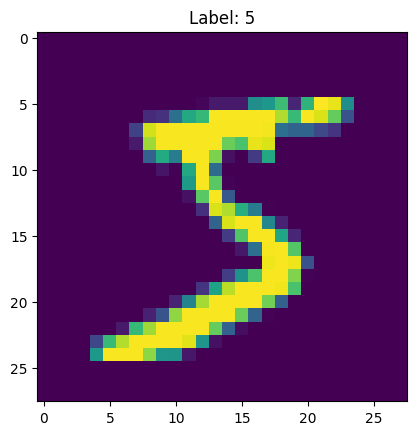

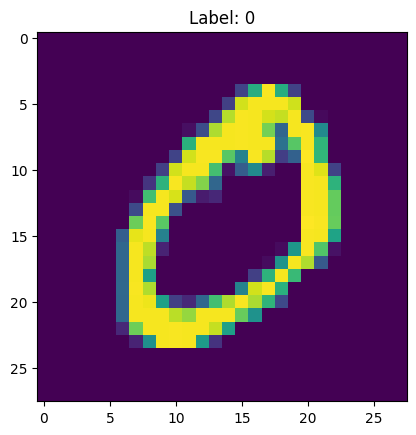

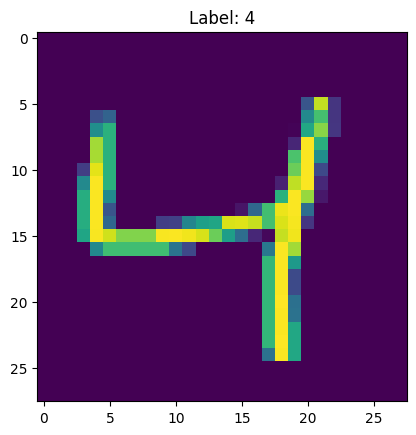

In [5]:
# Displaying a few images
for i in range(3):
  plt.imshow(x_train[i])
  plt.title('Label: %d' % y_train[i])
  plt.show()

In [6]:
# Building the model
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
]
)

In [7]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Train the model
r=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2938 - accuracy: 0.9147 - val_loss: 0.1398 - val_accuracy: 0.9599
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1435 - accuracy: 0.9574 - val_loss: 0.0979 - val_accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1095 - accuracy: 0.9667 - val_loss: 0.0936 - val_accuracy: 0.9702
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.0782 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0749 - accuracy: 0.9758 - val_loss: 0.0784 - val_accuracy: 0.9761


In [9]:
# Evaluating the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9761


[0.07838338613510132, 0.9761000275611877]

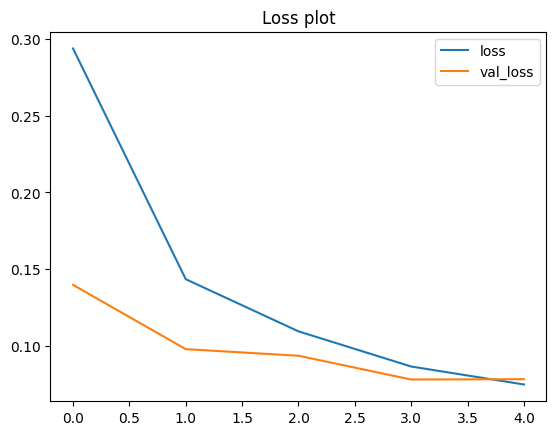

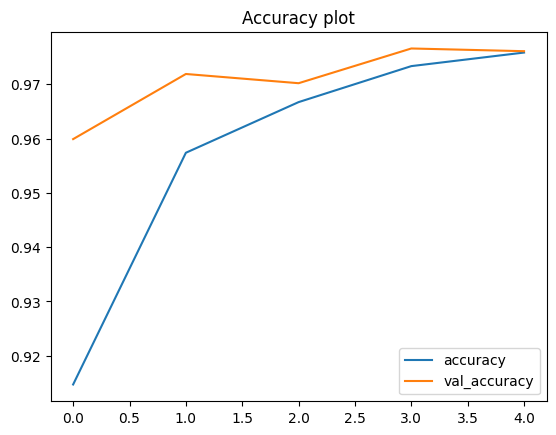

In [10]:
# Accuracy and loss plots
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("Loss plot")
plt.legend()
plt.show()
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.title("Accuracy plot")
plt.legend()
plt.show()

In [11]:
# Confusion matrix and classification report
y_pred_prob=model.predict(x_test)
y_pred=np.argmax(y_pred_prob,axis=1)
report=classification_report(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


In [12]:
confusion_matrix

array([[ 971,    0,    2,    1,    0,    1,    2,    0,    2,    1],
       [   0, 1123,    3,    2,    0,    1,    2,    0,    4,    0],
       [   2,    0, 1004,    6,    1,    0,    2,    5,   12,    0],
       [   1,    0,    4,  982,    0,    8,    0,    5,    8,    2],
       [   2,    0,    2,    0,  948,    1,    4,    3,    2,   20],
       [   3,    0,    0,    8,    1,  869,    5,    0,    5,    1],
       [   8,    3,    2,    1,    4,    5,  929,    0,    6,    0],
       [   1,    4,   10,    2,    0,    0,    0, 1001,    2,    8],
       [   3,    0,    1,    5,    2,    5,    1,    2,  952,    3],
       [   2,    3,    0,    1,    7,    4,    0,    5,    5,  982]])

In [ ]:
# Displaying confusion matrix
import itertools
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
  print(cm)


In [51]:
# Displaying the classification report
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

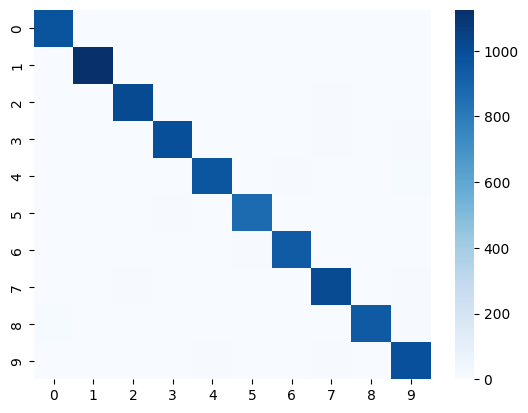

In [60]:
sns.heatmap(confusion_matrix,cmap='Blues')


In [15]:
# Importing the required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc

In [46]:
# Loading the dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [21]:
x_train.shape
import cv2

In [47]:
x_train,x_test=x_train/255.0,x_test/255.0

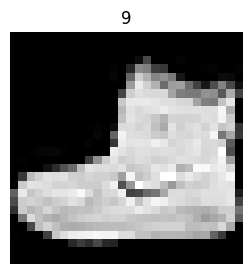

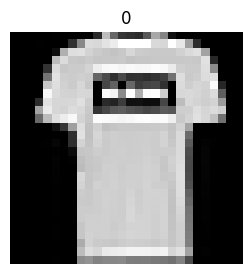

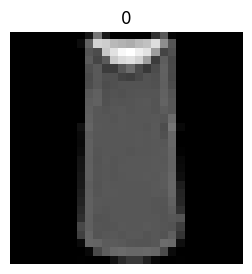

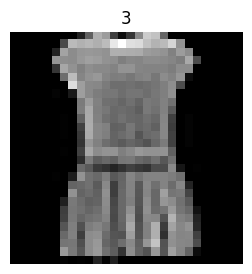

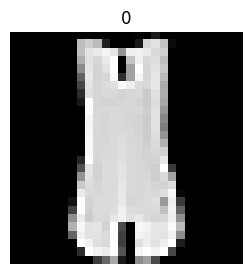

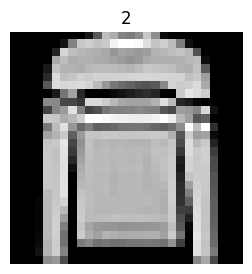

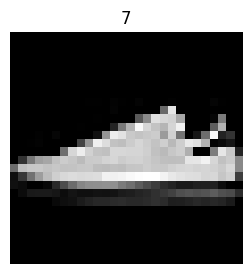

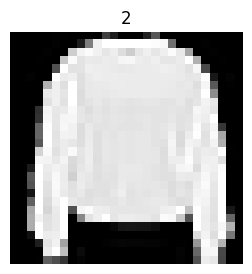

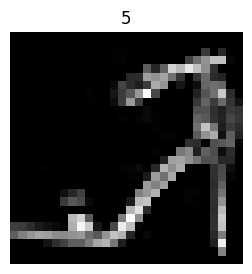

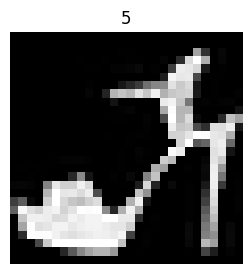

In [37]:
for i in range(10):
  plt.figure(figsize=(3,5))
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
  plt.show()

In [39]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7767 - val_loss: 0.4343 - val_accuracy: 0.8404
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4782 - accuracy: 0.8268 - val_loss: 0.3938 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8395 - val_loss: 0.3845 - val_accuracy: 0.8570
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4263 - accuracy: 0.8437 - val_loss: 0.3655 - val_accuracy: 0.8670
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4085 - accuracy: 0.8508 - val_loss: 0.3707 - val_accuracy: 0.8651
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8574 - val_loss: 0.3456 - val_accuracy: 0.8755
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8568 - val_loss: 0.3542 - val_accuracy:

In [49]:
y_pred_prob=model.predict(x_test)
y_pred=np.argmax(y_pred_prob,axis=1)

313/313 [==============================] - 1s 2ms/step


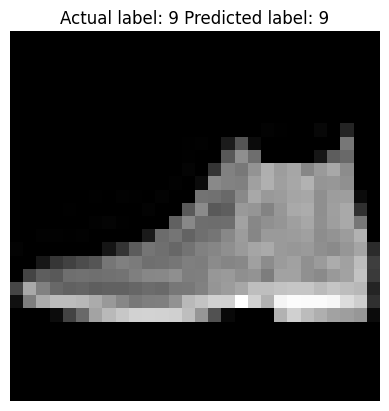

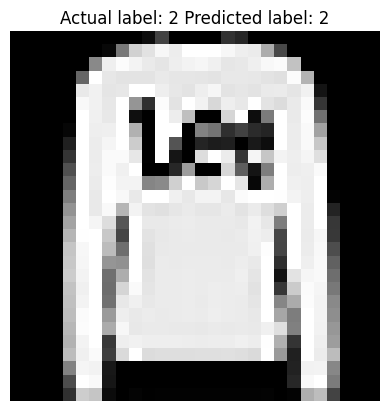

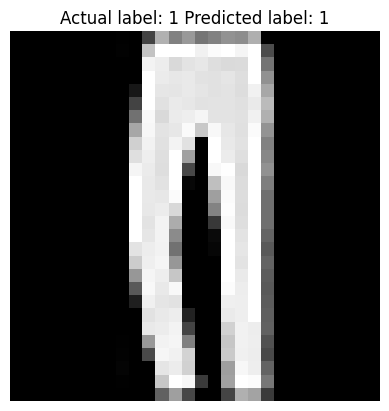

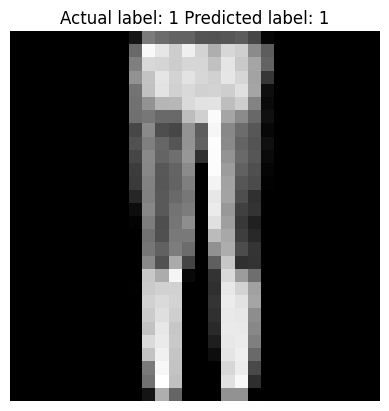

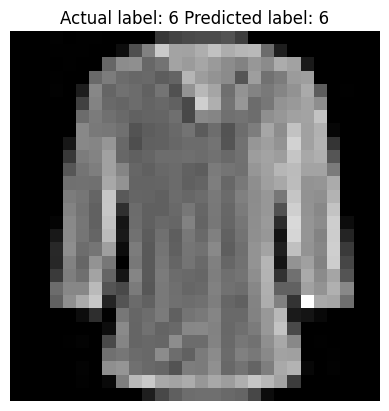

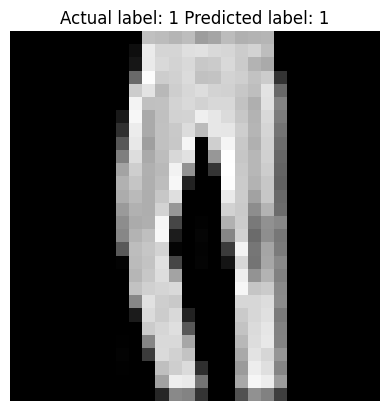

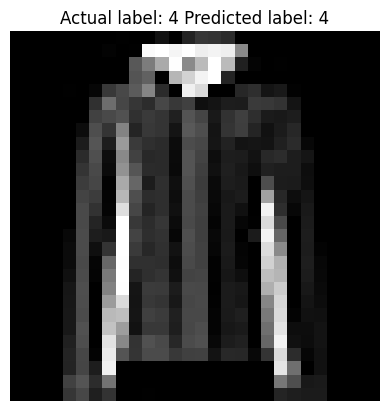

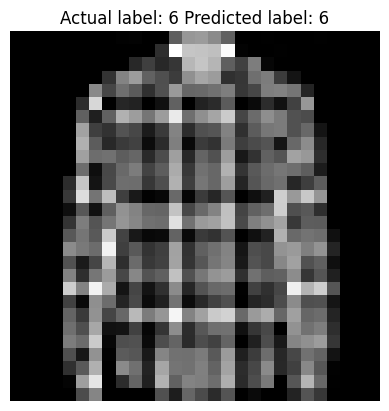

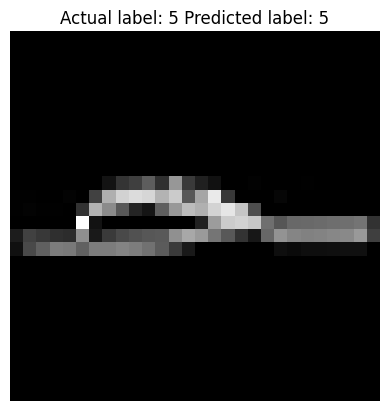

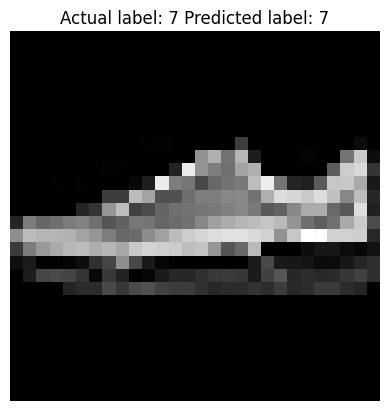

In [61]:
for i in range(10):
  plt.imshow(x_test[i],cmap='gray')
  plt.title(f'Actual label: {y_test[i]} Predicted label: {y_pred[i]}')
  plt.axis('off')
  plt.show()

In [52]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.68      0.84      0.75      1000
           3       0.89      0.88      0.88      1000
           4       0.76      0.79      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.51      0.62      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [57]:
y_pred_prob=model.predict(x_test)
y_pred=np.argmax(y_pred_prob,axis=1)
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

313/313 [==============================] - 1s 4ms/step


array([[872,   3,  21,  22,   0,   1,  76,   0,   5,   0],
       [  5, 958,   5,  23,   3,   0,   3,   0,   3,   0],
       [ 18,   0, 844,  10, 108,   0,  19,   0,   1,   0],
       [ 39,   7,  19, 878,  32,   0,  25,   0,   0,   0],
       [  0,   0, 159,  27, 786,   0,  27,   0,   1,   0],
       [  0,   0,   0,   1,   0, 955,   0,  25,   1,  18],
       [176,   1, 175,  27, 100,   0, 513,   0,   8,   0],
       [  0,   0,   0,   0,   0,  21,   0, 940,   0,  39],
       [  9,   0,  13,   4,   3,   2,   4,   4, 961,   0],
       [  0,   0,   0,   0,   0,   7,   1,  34,   0, 958]])

In [ ]:
fpr=dict()
tpr=dict()
auc=dict()
for i in

In [38]:
unique_labels=set(y_train)
unique_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

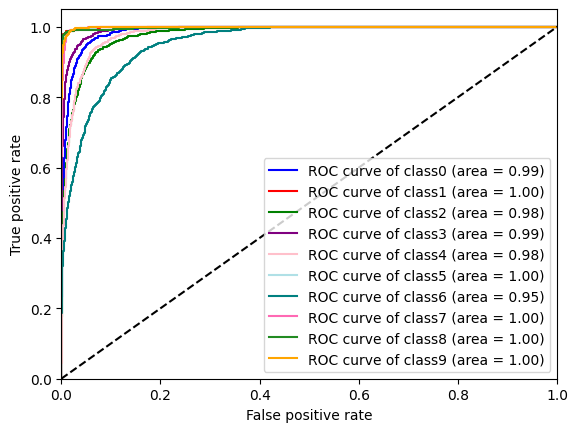

In [59]:
fpr=dict()
tpr=dict()
roc_auc=dict()
y_test_bin=label_binarize(y_test,classes=np.arange(10))
for i in range(10):
  fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_pred_prob[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])
colors=['blue','red','green','purple','pink','powderblue','teal','hotpink','forestgreen','orange','cyan']
for i, color in zip(range(10),colors):
  plt.plot(fpr[i],tpr[i],color=color,label=f'ROC curve of class{i} (area = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
